## Z Test

In einem Stichproben Fall, um den Mittelwert einer Stichprobe mit dem Erwartungswert ihrer Population zu vergleichen, können wir den Z-Test verwenden, wenn die folgenden Voraussetzungen erfüllt sind:

### Voraussetzungen:

- die **Varianz** **$(\sigma^2)$** der Population muss bekannt sein
- entweder muss die Population **normalverteilt** sein oder die Stichprobengröße muss **groß genug** sein (i.d.R: $n \geq 30$) aufgrund des zentralen Grenzwertstheorems
- die Stichprobe muss eine **unabhängige** Zufallsstichprobe sein
- die untersuchten Daten müssen **stetig** (metrisch) skaliert sein

### Hypothesen:

#### Einseitig:
$$H_0: \mu = \mu_0 \Rightarrow H_1: \mu \neq \mu_0$$

#### Zweiseitig:
$$H_0: \mu \geq \mu_0 \Rightarrow H_1: \mu < \mu_0$$
$$\vee$$
$$H_0: \mu \leq \mu_0 \Rightarrow H_1: \mu > \mu_0$$
wobei, $\mu$ ist der Erwartungswert der Stichprobe und $\mu_0$ ist der Erwartungswert der Population (hypothetischer Mittelwert).

Man will also prüfen, ob $\mu$ signifikant von $\mu_0$ abweicht.

### Teststatistik:

$$ Z = \frac{\bar{X} - \mu_0}{\sigma_{\bar{X}}}$$
$$\therefore \sigma_{\bar{X}} = \sqrt{\frac{\sigma^2}{n}}$$
$$\Rightarrow \boxed{Z = \frac{\bar{X} - \mu_0}{\sigma}\sqrt{n}}$$
wobei,

$\bar{X}$ - Stichprobenmittelwert

$\mu_0$ - Erwartungswert der Population

$\sigma$ - Populationsstandardabweichung

$n$ - Stichprobengröße

$\sigma_{\bar{X}}$ - Standardschätzfehler des Mittelwerts

### Kritischer Wert:

Für zweiseitigen Test:
$$Z_{krit} = \left| Z_{(1 - \frac{\alpha}{2})} \right|$$

Für einseitigen Test:
$$Z_{krit} = Z_{(1 - \alpha)}$$

wobei, 

$Z_{krit}$ - kritischer Z-Wert

$\alpha$ - Signifikanzniveau

### Ergebnis:

$$\text{Falls:} \quad |Z| > |Z_{krit}| \quad \Rightarrow \text{lehne} \, H_0 \, \text{ab} \quad \Rightarrow \text{nehme} \, H_1 \, \text{an}$$

## Beispiel

### Problemstellung:
In einer Fabrik werden Glühbirnen mit einer Lebensdauer von $1000$ Stunden produziert. Die Lebensdauer folgt einer **Normalverteilung** mit einer Standardabweichung von $20$ Stunden. Eine Stichprobe von $49$ Glühbirnen ergibt jedoch einen Mittelwert von $980$ Stunden. Man will jetzt überprüfen, ob dieser beobachtete Mittelwert von $980$ Stunden signifikant vom erwarteten Wert abweicht, um das sagen zu können, dass die tatsächliche durchschnittliche Lebensdauer der Glühbirnen möglicherweise nicht $1000$ Stunden beträgt.

### Voraussetzungen:

- die **Varianz** **$(\sigma^2)$** der Population muss bekannt sein $\boxed{\checkmark}$
- entweder muss die Population **normalverteilt** sein oder die Stichprobengröße muss **groß genug** sein (i.d.R: $n \geq 30$) aufgrund des zentralen Grenzwertstheorems $\boxed{\checkmark}$
- die Stichprobe muss eine **unabhängige** Zufallsstichprobe sein $\boxed{\checkmark}$
- die untersuchten Daten müssen **stetig** (metrisch) skaliert sein $\boxed{\checkmark}$

### Hypothesen:

Wir wollen jetzt nur einseitig testen:

$$H_0: \mu = 1000 \quad \Rightarrow \, H_1: \mu \neq 1000$$

### Teststatistik:

$$Z = \frac{\bar{X} - \mu_0}{\sigma}\sqrt{n}$$

$\therefore \quad \bar{X} = 980, \quad \mu_0 = 1000, \quad \sigma = 20, \quad n = 49$

$$\Rightarrow Z = \frac{980 - 1000}{20}\sqrt{49}$$

$$\Leftrightarrow \boxed{Z = -7}$$

### Kritischer Wert:

Für zweiseitigen Test:
$$Z_{krit} = \left| Z_{(1 - \frac{\alpha}{2})} \right|$$

Wir nehmen $\alpha = 0.05$:

$$\Rightarrow Z_{krit} = \left| Z_{(1 - \frac{0.05}{2})} \right| = \left|Z_{(0,975)}\right| = |1,96|$$

### Ergenis:

$$\text{Da} \quad |Z| = 7 > 1,96 = |Z_{(krit)}| \quad \Rightarrow H_0 \, \, \text{wird abgelehnt} \quad \Rightarrow H_1: \mu \neq 1000$$

### Fazit:
Wir können mit **95%iger** Sicherheit sagen, dass der durchschnittliche Lebensdauer der Glühbirnen nicht $1000$ Stunden beträgt.


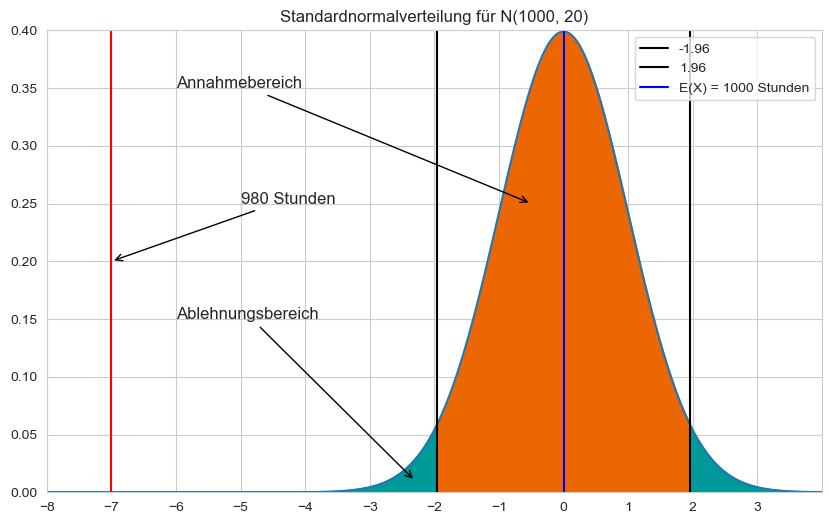

In [93]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

erwartungswert = 0
standardabweichung = 1
untere_grenze = -1.96
obere_grenze = 1.96
test_wert = -7
x_anfang = -8
x_ende = 4

x_werte = np.linspace(x_anfang, x_ende, 1000)
y_werte = stats.norm.pdf(x_werte, erwartungswert, standardabweichung)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(x_werte, y_werte)
plt.axvline(x=untere_grenze, color='black', label=untere_grenze)
plt.axvline(x=obere_grenze, color='black', label=obere_grenze)
plt.axvline(x=test_wert, color='r')
plt.axvline(x=erwartungswert, color='b', label="E(X) = 1000 Stunden")
plt.fill_between(x_werte, 
                 y_werte, 
                 where=(x_werte < untere_grenze) | (x_werte > obere_grenze), color='#009999')
plt.fill_between(x_werte, 
                 y_werte, 
                 where=(x_werte > untere_grenze) & (x_werte < obere_grenze), color='#EC6602')

plt.annotate("Ablehnungsbereich", 
             xy=(-2.3, 0.01), 
             xytext=(-6, 0.15), 
             arrowprops=dict(arrowstyle="->", color='black'), 
             fontsize=12)

plt.annotate("Annahmebereich", 
             xy=(-0.5, 0.25), 
             xytext=(-6, 0.35), 
             arrowprops=dict(arrowstyle="->", color='black'), 
             fontsize=12)

plt.annotate("980 Stunden", 
             xy=(-7, 0.20), 
             xytext=(-5, 0.25), 
             arrowprops=dict(arrowstyle="->", color='black'), 
             fontsize=12)

plt.title('Standardnormalverteilung für N(1000, 20)')
plt.xticks(np.arange(x_anfang, x_ende))
plt.xlim(x_anfang, x_ende)
plt.ylim(0, 0.4)

plt.legend()
plt.show()
